<a href="https://colab.research.google.com/github/ShitangshuMaity/my_work/blob/master/Assignment_2_MMA_823_Sid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MMA 823 Assignment 2 Bankruptcy Problem

# IMPORT LIBRARY

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

Upload the dataset into the colab notebook

In [ ]:
bankdata = pd.read_excel('Bankruptcy_data_Final.xlsx', na_values= np.nan)

In [ ]:
# alternative to uploading the dataset

# from google.colab import files

# data = files.upload()

# uncomment this to use this option.

In [ ]:
bankdata.head(5)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [ ]:
print("Dataframe dimension: ", bankdata.shape,"\n")

print("DataFrame Information:")
print("      .")
print("      .")
print("      .")
print("      V\n")
bankdata.info()

Dataframe dimension:  (92872, 13) 

DataFrame Information:
      .
      .
      .
      V

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


# PRE-PROCESSING

In [ ]:
# Percentage of Missing Data
miss_bankdata = bankdata.isnull().sum()*100/len(bankdata)
print(miss_bankdata)

EPS                   0.005384
Liquidity             0.265957
Profitability         0.265957
Productivity          0.265957
Leverage Ratio        0.027996
Asset Turnover        0.265957
Operational Margin    5.983504
Return on Equity      0.008614
Market Book Ratio     0.061375
Assets Growth         7.215307
Sales Growth          7.215307
Employee Growth       7.548023
BK                    0.000000
dtype: float64


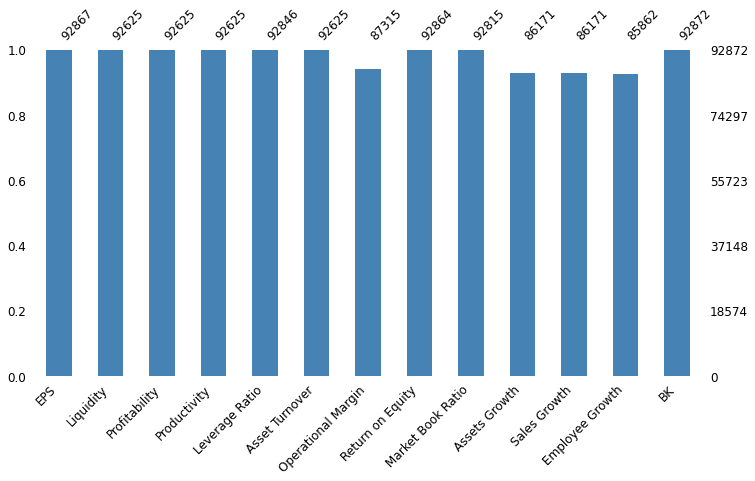

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(bankdata, figsize=(12, 6), fontsize=12, color='steelblue')

Visualizing the missing observations in the dataset

The plot appears blank(white) wherever there are missing values.

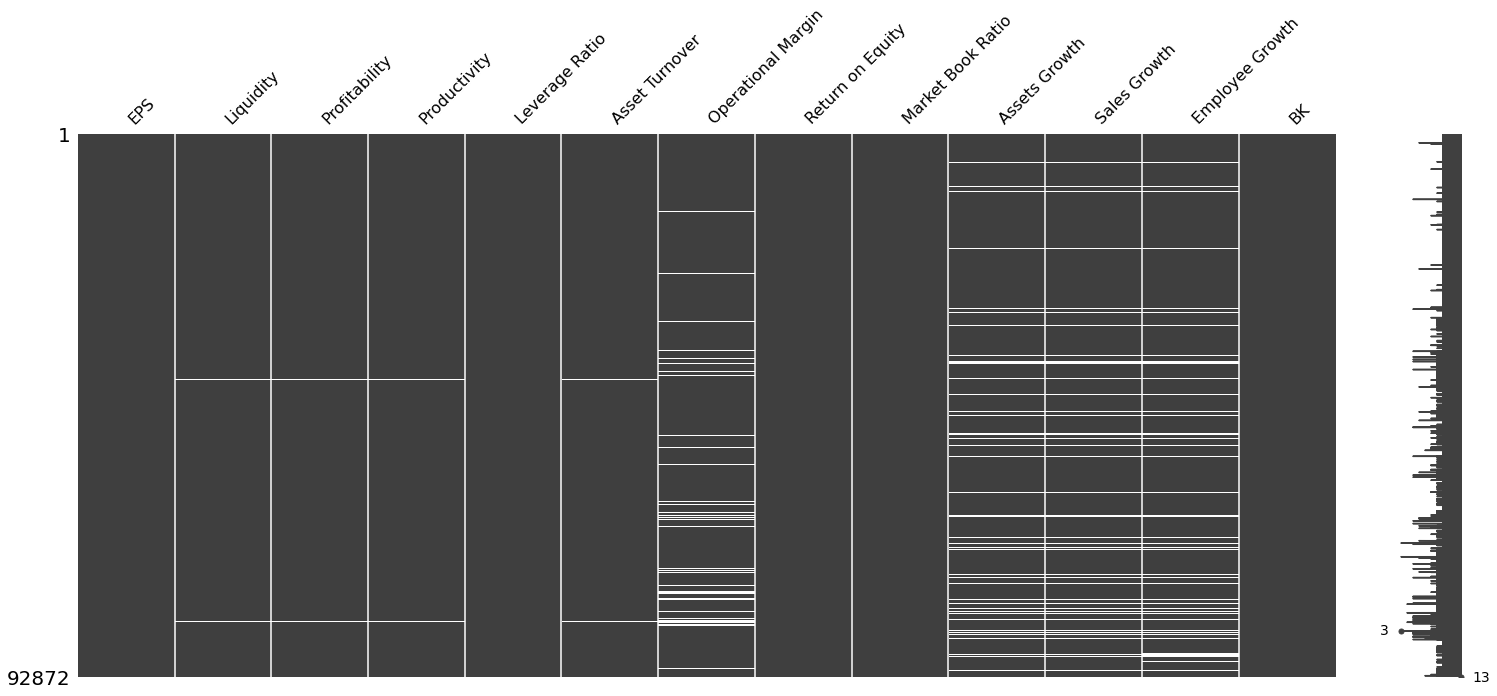

In [ ]:
msno.matrix(bankdata)

Target Variable Analysis
0: Non-Bankrupt
1: Bankrupt


Bankrupt vs Non-Bankrupt
 AxesSubplot(0.125,0.125;0.775x0.755) 

Non-Bankrupt data: 99.39917305538806 %
Bankrupt data: 0.600826944611939 %


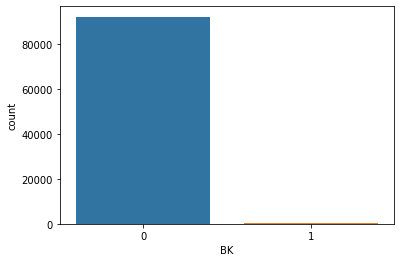

In [ ]:
print('Target Variable Analysis')

print("0: Non-Bankrupt")
print("1: Bankrupt\n")

print("\nBankrupt vs Non-Bankrupt\n", sns.countplot(x='BK',data=bankdata, ),"\n")

print("Non-Bankrupt data:", ((bankdata['BK'] == 0).sum()/len(bankdata['BK'])*100),"%")
print("Bankrupt data:", ((bankdata['BK'] == 1).sum()/len(bankdata['BK'])*100),"%")

# DATA DICTONARY


**Features**

EPS – Earnings Per Share

Liquidity – Working Capital/Total Assets

Profitability – Retained Earnings/Total Assets

Productivity – EBIT/Total Assets

Leverage Ratio – (Total Long-term debt + Debt in Current liabilities)/Stockholders Equity

Asset Turnover – Sales/ Total Assets

Operational Margin – EBIT/Sales

Market Book Ratio – (Price Close Annual Fiscal * Common Shares Outstanding)/Book Value Per Share

Asset Growth – Change in assets from previous year

Sales Growth – Change in sales from previous year

Employee Growth – Change in employees from previous year

Tobin’s Q – (Total market value of company + liabilities)/ (Total asset or book value + liabilities)



---


**Label**

BK – Company bankrupt or not


# STEPS


*   Impute the missing value - Use either simple imputer or KNN Imputer
*   Oversample / Undersample the target varible - 'BK'

*   Reference to video for handling data imbalance: https://www.youtube.com/watch?v=JnlM4yLFNuo

*   Could use Pycaret to treat the data imbalance



## Impute missing values

Imputing dataset using Simple Imputer

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="constant")

In [ ]:
bankdata_si = bankdata.copy()
bankdata_si.iloc[:,:] = si.fit_transform(bankdata_si)
bankdata_si.isnull().sum()/len(bankdata_si)

EPS                   0.0
Liquidity             0.0
Profitability         0.0
Productivity          0.0
Leverage Ratio        0.0
Asset Turnover        0.0
Operational Margin    0.0
Return on Equity      0.0
Market Book Ratio     0.0
Assets Growth         0.0
Sales Growth          0.0
Employee Growth       0.0
BK                    0.0
dtype: float64

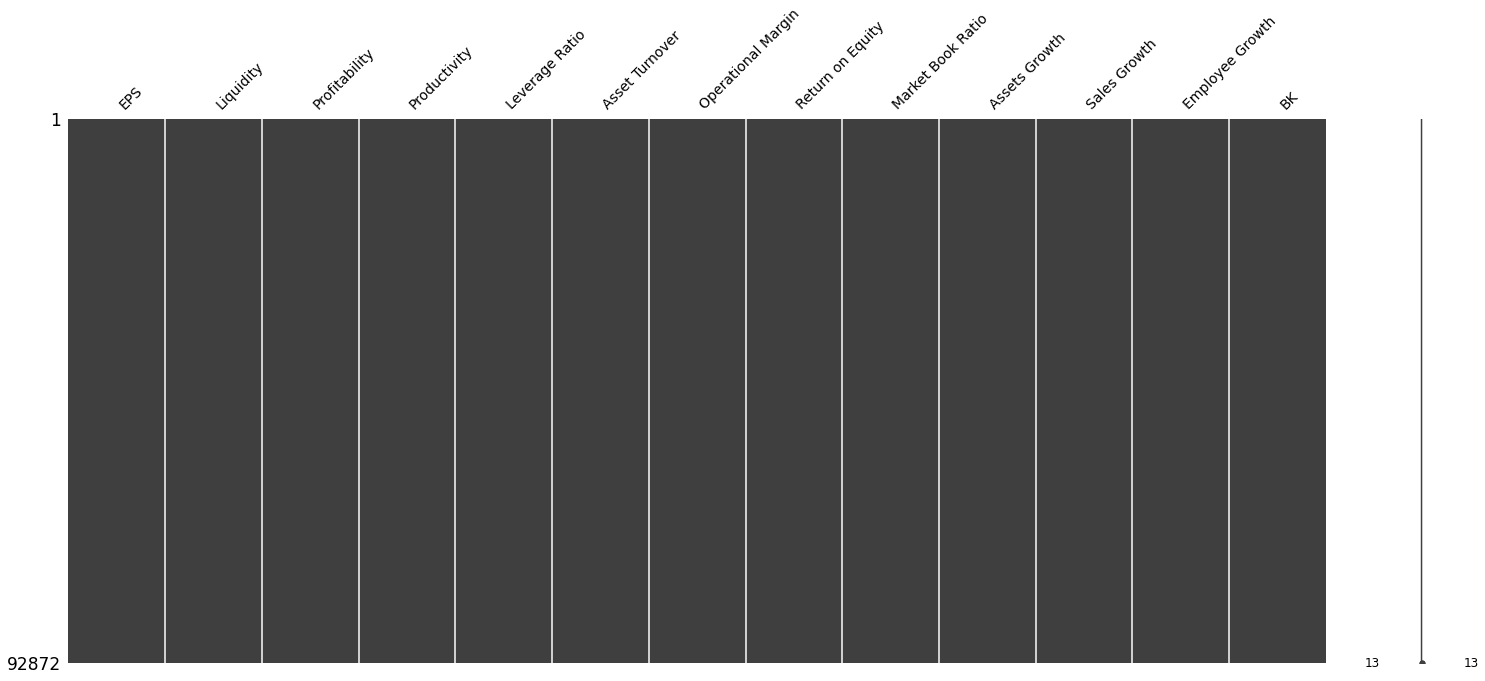

In [ ]:
msno.matrix(df = bankdata_si, fontsize=14)

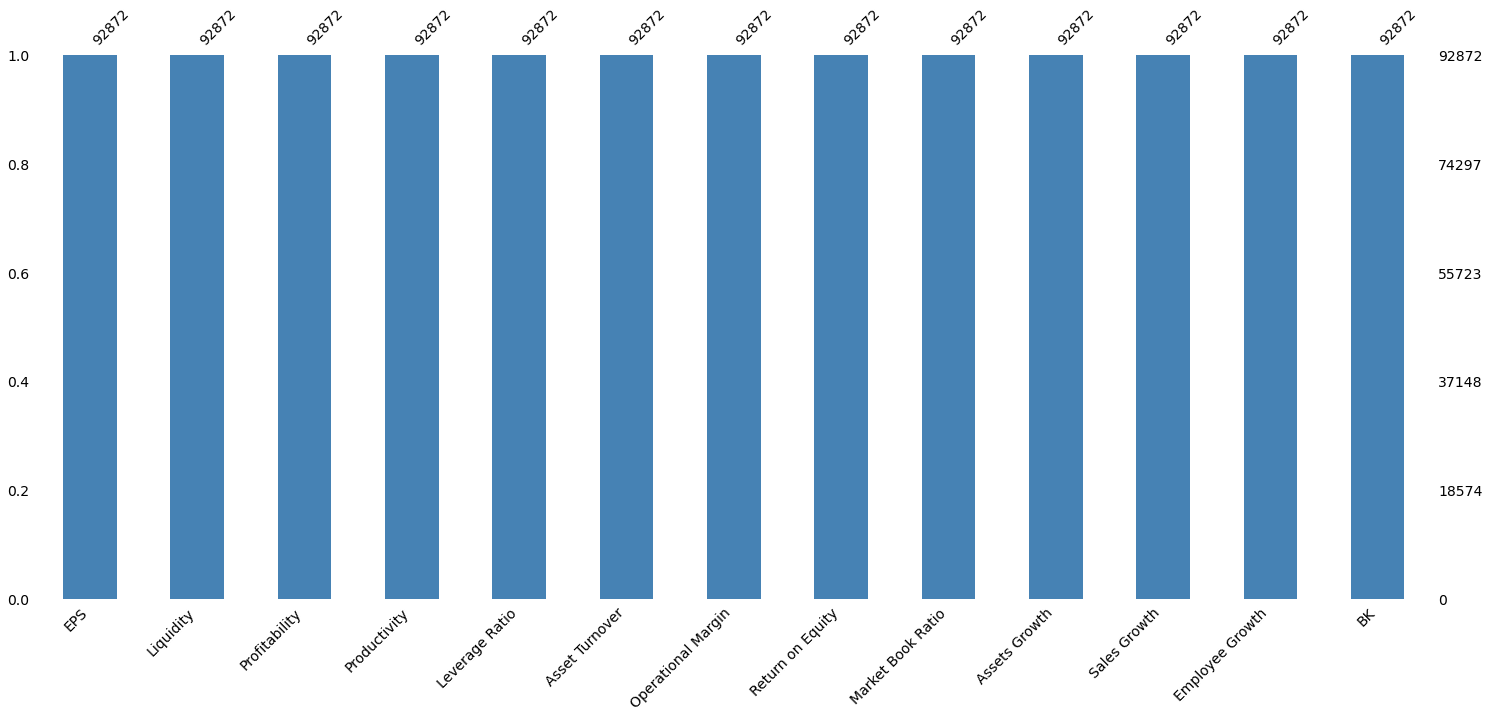

In [ ]:
msno.bar(df = bankdata_si, fontsize= 14, color= 'steelblue')

Imputing dataset using KNN Imputer

In [ ]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=5, weights="uniform")

In [ ]:
bankdata_ki = bankdata.copy()
bankdata_ki.iloc[:,:] = ki.fit_transform(bankdata_ki)
#data_ki_trans = ki.fit_transform(data_ki)

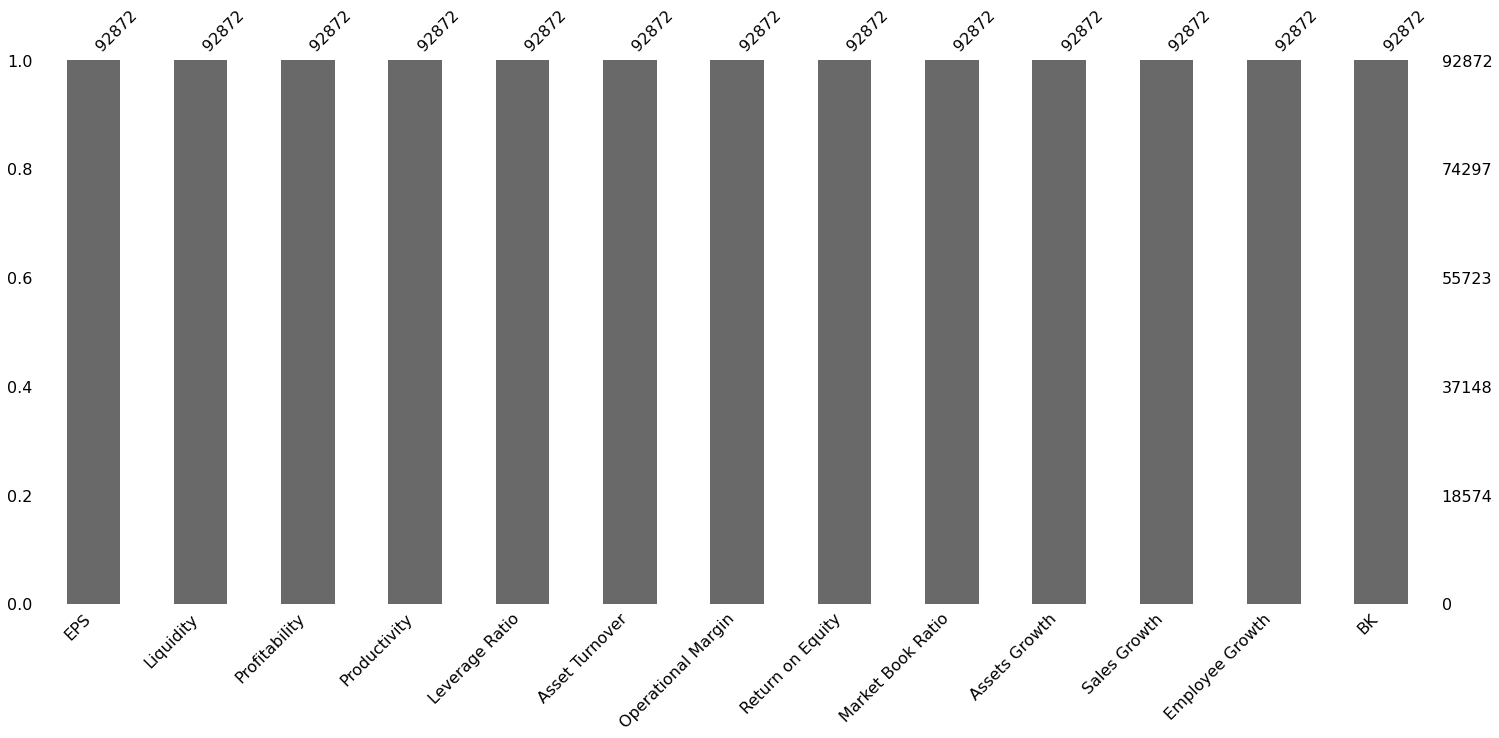

In [ ]:
msno.bar(df = bankdata_ki)

In [ ]:
# Dataframe after imputation (KNN Imputation)

bankdata_ki

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.580000,0.360000,0.180000,0.130000,1.330000,1.770000,0.070000,0.150000,2.220000,0.111757,-0.002385,0.057881,0.0
1,1.410000,0.360000,0.190000,0.120000,1.310000,1.590000,0.070000,0.130000,2.410000,0.126319,0.014278,0.040179,0.0
2,0.310000,0.320000,0.130000,0.080000,1.030000,1.550000,0.050000,0.040000,2.560000,0.368077,0.327909,0.566524,0.0
3,0.710000,0.280000,0.140000,0.080000,0.800000,1.390000,0.060000,0.050000,5.280000,-0.020809,-0.118904,-0.095890,0.0
4,0.750000,0.410000,0.130000,0.080000,0.200000,1.300000,0.060000,0.040000,8.680000,0.233089,0.146807,0.053030,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92867,-1.488171,-0.015494,-0.758859,-0.056905,-1042.104918,0.174115,-0.326823,-6.614095,-1.846719,-0.073287,-0.557483,-0.076923,0.0
92868,-1.807630,0.093838,-1.204734,-0.121122,-4.530214,0.215844,-0.561155,-4.519074,-2.474549,-0.201835,-0.010544,-0.208333,0.0
92869,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.569448,3274.505633,-0.168001,-0.020206,-0.105263,0.0
92870,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,0.076936,-0.170928,-0.058824,0.0


Visualising the correlation between the features



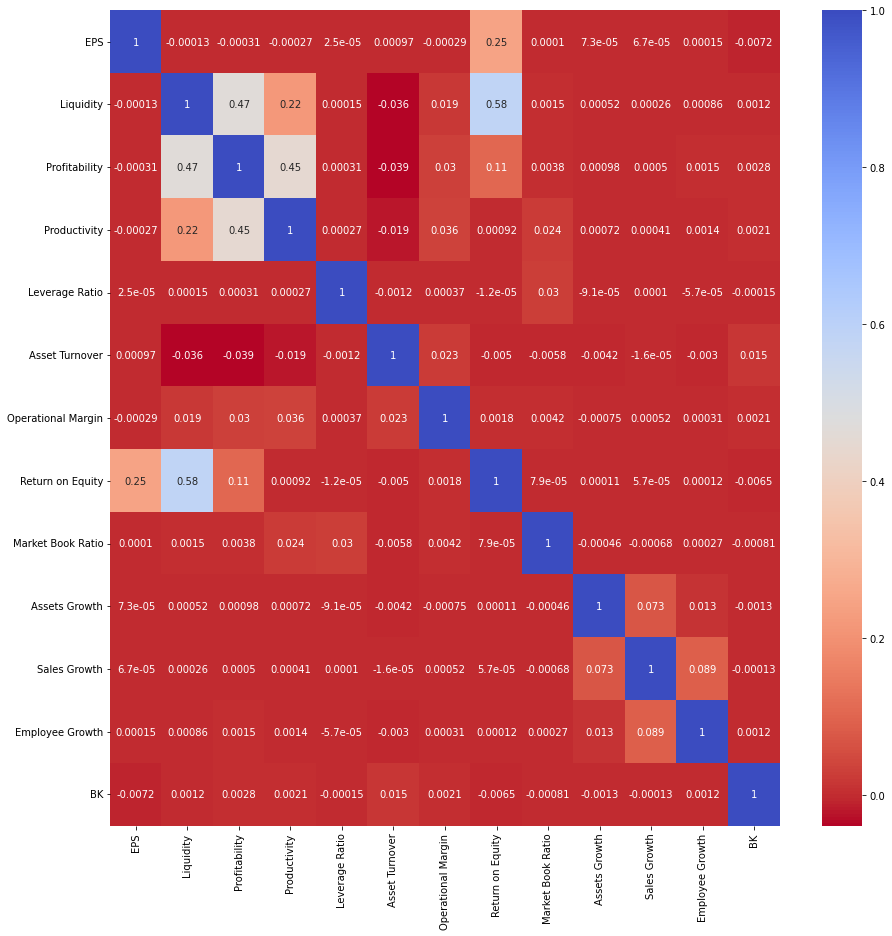

In [ ]:
print("Visualising the correlation between the features\n")
corr = bankdata_ki.corr()

plt.subplots(figsize=(15,15))

sns.heatmap(corr, cmap='coolwarm_r',annot=True)
plt.show()

## Balancing the DataSet.

Since the target variable has data imbalance Non Bankrupt (0) vs Bankrupt (1) = 99.3% vs 0.06%.

It would be better to oversample the minority data. Undersampling of majority data would lead to data loss.

SMOTE Technique is being used oversampling..

The data frame used here is the one imputed using KNN Imputer.

In [ ]:
# The feature variables and the target variable will be separated in the bankdata dataframe
x = bankdata_ki.drop(['BK'], axis = 1)
y = bankdata_ki['BK']

In [ ]:
x.head(5)

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,0.111757,-0.002385,0.057881
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030


In [ ]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: BK, dtype: float64

In [ ]:
print("Shape of x dataset: ", x.shape)
print("Shape of y dataset: ", y.shape)

Shape of x dataset:  (92872, 12)
Shape of y dataset:  (92872,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print("Target values in train data: \n", 
      y_train.value_counts())


print("\nTarget values in test data: \n", 
      y_test.value_counts())

Target values in train data: 
 0.0    69235
1.0      419
Name: BK, dtype: int64

Target values in test data: 
 0.0    23079
1.0      139
Name: BK, dtype: int64


In [ ]:
print("Target values in test data: \n", 
      y_test.value_counts())

Target values in test data: 
 0.0    23079
1.0      139
Name: BK, dtype: int64


In [ ]:
# SMOTE being applied to KNN Imputed dataset
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x_osm, y_osm = oversample.fit_resample(x_train, y_train)

In [ ]:
print(f'''Shape of x_train before SMOTE: {x_train.shape}
Shape of x_train train after SMOTE: {x_osm.shape}''')

print(f'''\nShape of y_train before SMOTE: {y_train.shape}
Shape of y_train after SMOTE: {y_osm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_osm.value_counts(normalize=True) * 100

Shape of x_train before SMOTE: (69654, 12)
Shape of x_train train after SMOTE: (138470, 12)

Shape of y_train before SMOTE: (69654,)
Shape of y_train after SMOTE: (138470,)

Balance of positive and negative classes (%):


0.0    50.0
1.0    50.0
Name: BK, dtype: float64

In [ ]:
np.bincount(y_osm)

array([69235, 69235])

## Machine Learning Algorithms

*   XGBoost - It is capable of handling the missing values.
*   Support Vector Machine
*   Random Forest
*   Logistic Regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report

### Model-1 | XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model1=XGBClassifier()
model1.fit(x_osm, y_osm)

XGBClassifier()

In [ ]:
y_pred_xgb=model1.predict(x_test)
print("y_pred:\n", y_pred_xgb)

y_pred:
 [0. 1. 1. ... 0. 0. 0.]


In [ ]:
acc1 = accuracy_score(y_test, y_pred_xgb,normalize=True)
print("Accuracy: %.2f%%" % (acc1 * 100.0),"\n")
print("Classification Report:\n", classification_report(y_test,y_pred_xgb))

Accuracy: 88.96% 

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94     23079
         1.0       0.04      0.77      0.08       139

    accuracy                           0.89     23218
   macro avg       0.52      0.83      0.51     23218
weighted avg       0.99      0.89      0.94     23218



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
precision_xgb  = precision_score(y_test, y_pred_xgb)
roc_auc_xgb= roc_auc_score(y_test, y_pred_xgb)

xgb_result = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_xgb],
                       "Recall"    : [recall_xgb],
                       "Precision" : [precision_xgb],
                       "F1"        : [f1_xgb],
                       "AUC"       : [roc_auc_xgb],
                      })
   
pd.set_option('max_columns', None)
print(xgb_result)

     Neg  True Neg  False Neg   Pos   TP    FP  Accuracy    Recall  Precision  \
0  20579     20547         32  2639  107  2532  0.889568  0.769784   0.040546   

         F1       AUC  
0  0.077034  0.830037  


In [ ]:
print("Accuracy: %.2f%%"  % (accuracy_xgb * 100.0))
print("f1-score: %.2f%%" % (f1_xgb* 100.0))
print("Recall: %.2f%%" % (recall_xgb* 100.0))
print("Precision: %.2f%%" % (precision_xgb* 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_xgb* 100.0))

cfm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:\n", cfm_xgb, "\n")

trueNegative=cfm_xgb[0][0]
falsePositive=cfm_xgb[0][1]
falseNegative=cfm_xgb[1][0]
truePositive=cfm_xgb[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

Accuracy: 88.96%
f1-score: 7.70%
Recall: 76.98%
Precision: 4.05%
ROC-AUC: 83.00%

Confusion Matrix:
 [[20547  2532]
 [   32   107]] 


CONFUSION MATRIX      VALUES

True Negative:         20547
False Positive:        2532
False Negative:        32
True Positive:         107


### Model-2 | Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(x_osm, y_osm)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_svm = model2.predict(x_test)
print("y_pred:\n", y_pred_svm)

acc2 = accuracy_score(y_test, y_pred_svm,normalize=True)
print("Accuracy: %.2f%%" % (acc2 * 100.0),"\n")
print("Classification Report of Logistic Regression:\n", classification_report(y_test,y_pred_svm))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
accuracy_svm   = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm  = precision_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)


logregresult = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_svm],
                       "Recall"    : [recall_svm],
                       "Precision" : [precision_svm],
                       "F1"        : [f1_svm],
                       "AUC"       : [roc_auc_svm],
                      })
   
pd.set_option('max_columns', None)
print(logregresult)

print("Accuracy: %.2f%%"  % (accuracy_svm * 100.0))
print("f1-score: %.2f%%" % (f1_svm * 100.0))
print("Recall: %.2f%%" % (recall_svm * 100.0))
print("Precision: %.2f%%" % (precision_svm * 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_svm * 100.0))

cfm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", cfm_svm, "\n")

trueNegative=cfm_svm[0][0]
falsePositive=cfm_svm[0][1]
falseNegative=cfm_svm[1][0]
truePositive=cfm_svm[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

y_pred:
 [1. 1. 1. ... 0. 0. 1.]
Accuracy: 19.38% 

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.99      0.19      0.32     23079
         1.0       0.01      0.82      0.01       139

    accuracy                           0.19     23218
   macro avg       0.50      0.51      0.17     23218
weighted avg       0.99      0.19      0.32     23218

    Neg  True Neg  False Neg    Pos   TP     FP  Accuracy    Recall  \
0  4410      4385         25  18808  114  18694  0.193772  0.820144   

   Precision        F1       AUC  
0   0.006061  0.012034  0.505072  
Accuracy: 19.38%
f1-score: 1.20%
Recall: 82.01%
Precision: 0.61%
ROC-AUC: 50.51%

Confusion Matrix:
 [[ 4385 18694]
 [   25   114]] 


CONFUSION MATRIX      VALUES

True Negative:         4385
False Positive:        18694
False Negative:        25
True Positive:         114


### Model-3 | Support Vector Machine Classifier

For reasons beyond me, the google colab is not able to run SVM model.

Might need to download the notebook and run it in anaconda or databricks.

In [ ]:
from sklearn import svm

In [ ]:
model3 = svm.SVC()

In [ ]:

model3.fit(x_osm, y_osm)

SVC()

The model finally did run. However it took 41 minutes and 31 seconds to fit.

In [ ]:
y_pred_svm = model3.predict(x_test)
print("y_pred:\n", y_pred_svm)

acc3 = accuracy_score(y_test, y_pred_svm,normalize=True)
print("Accuracy: %.2f%%" % (acc3 * 100.0),"\n")
print("Classification Report of Logistic Regression:\n", classification_report(y_test,y_pred_svm))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
accuracy_svm   = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm  = precision_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)


logregresult = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_svm],
                       "Recall"    : [recall_svm],
                       "Precision" : [precision_svm],
                       "F1"        : [f1_svm],
                       "AUC"       : [roc_auc_svm],
                      })
   
pd.set_option('max_columns', None)
print(logregresult)

print("Accuracy: %.2f%%"  % (accuracy_svm * 100.0))
print("f1-score: %.2f%%" % (f1_svm * 100.0))
print("Recall: %.2f%%" % (recall_svm * 100.0))
print("Precision: %.2f%%" % (precision_svm * 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_svm * 100.0))

cfm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:\n", cfm_svm, "\n")

trueNegative=cfm_svm[0][0]
falsePositive=cfm_svm[0][1]
falseNegative=cfm_svm[1][0]
truePositive=cfm_svm[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

y_pred:
 [1. 1. 1. ... 0. 1. 1.]
Accuracy: 13.15% 

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.13      0.22     23079
         1.0       0.01      0.97      0.01       139

    accuracy                           0.13     23218
   macro avg       0.50      0.55      0.12     23218
weighted avg       0.99      0.13      0.22     23218

    Neg  True Neg  False Neg    Pos   TP     FP  Accuracy    Recall  \
0  2922      2918          4  20296  135  20161  0.131493  0.971223   

   Precision        F1       AUC  
0   0.006652  0.013213  0.548829  
Accuracy: 13.15%
f1-score: 1.32%
Recall: 97.12%
Precision: 0.67%
ROC-AUC: 54.88%

Confusion Matrix:
 [[ 2918 20161]
 [    4   135]] 


CONFUSION MATRIX      VALUES

True Negative:         2918
False Positive:        20161
False Negative:        4
True Positive:         135


### Model-4 | Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(n_estimators=500, max_depth=None, max_leaf_nodes=None, class_weight='balanced')
model4.fit(x_osm, y_osm)

RandomForestClassifier(class_weight='balanced', n_estimators=500)

In [ ]:
y_pred_rfc = model4.predict(x_test)
print("y_pred:\n", y_pred_rfc)

acc4 = accuracy_score(y_test, y_pred_rfc,normalize=True)
print("Accuracy: %.2f%%" % (acc4 * 100.0),"\n")
print("Classification Report of Logistic Regression:\n", classification_report(y_test,y_pred_rfc))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfc).ravel()
accuracy_rfc   = accuracy_score(y_test, y_pred_rfc)
f1_rfc = f1_score(y_test, y_pred_rfc)
recall_rfc = recall_score(y_test, y_pred_rfc)
precision_rfc  = precision_score(y_test, y_pred_rfc)
roc_auc_rfc = roc_auc_score(y_test, y_pred_rfc)


logregresult = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_rfc],
                       "Recall"    : [recall_rfc],
                       "Precision" : [precision_rfc],
                       "F1"        : [f1_rfc],
                       "AUC"       : [roc_auc_rfc],
                      })
   
pd.set_option('max_columns', None)
print(logregresult)

print("Accuracy: %.2f%%"  % (accuracy_rfc * 100.0))
print("f1-score: %.2f%%" % (f1_rfc * 100.0))
print("Recall: %.2f%%" % (recall_rfc * 100.0))
print("Precision: %.2f%%" % (precision_rfc * 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_rfc * 100.0))

cfm_rfc = confusion_matrix(y_test, y_pred_rfc)
print("\nConfusion Matrix:\n", cfm_rfc, "\n")

trueNegative=cfm_rfc[0][0]
falsePositive=cfm_rfc[0][1]
falseNegative=cfm_rfc[1][0]
truePositive=cfm_rfc[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

y_pred:
 [0. 0. 0. ... 0. 0. 0.]
Accuracy: 98.27% 

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     23079
         1.0       0.12      0.29      0.17       139

    accuracy                           0.98     23218
   macro avg       0.56      0.64      0.58     23218
weighted avg       0.99      0.98      0.99     23218

     Neg  True Neg  False Neg  Pos  TP   FP  Accuracy    Recall  Precision  \
0  22874     22776         98  344  41  303  0.982729  0.294964   0.119186   

         F1       AUC  
0  0.169772  0.640918  
Accuracy: 98.27%
f1-score: 16.98%
Recall: 29.50%
Precision: 11.92%
ROC-AUC: 64.09%

Confusion Matrix:
 [[22776   303]
 [   98    41]] 


CONFUSION MATRIX      VALUES

True Negative:         22776
False Positive:        303
False Negative:        98
True Positive:         41


### Model-5 | K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=5, weights="uniform", algorithm="auto")
model5.fit(x_osm, y_osm)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model5.predict(x_test)
print("y_pred:\n", y_pred_knn)

acc5 = accuracy_score(y_test, y_pred_knn,normalize=True)
print("Accuracy: %.2f%%" % (acc5 * 100.0),"\n")
print("Classification Report of Logistic Regression:\n", classification_report(y_test,y_pred_knn))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
accuracy_knn   = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn  = precision_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)


logregresult = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_knn],
                       "Recall"    : [recall_knn],
                       "Precision" : [precision_knn],
                       "F1"        : [f1_knn],
                       "AUC"       : [roc_auc_knn],
                      })
   
pd.set_option('max_columns', None)
print(logregresult)

print("Accuracy: %.2f%%"  % (accuracy_knn * 100.0))
print("f1-score: %.2f%%" % (f1_knn * 100.0))
print("Recall: %.2f%%" % (recall_knn * 100.0))
print("Precision: %.2f%%" % (precision_knn * 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_knn * 100.0))

cfm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:\n", cfm_knn, "\n")

trueNegative=cfm_knn[0][0]
falsePositive=cfm_knn[0][1]
falseNegative=cfm_knn[1][0]
truePositive=cfm_knn[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

y_pred:
 [0. 0. 0. ... 0. 0. 0.]
Accuracy: 92.85% 

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     23079
         1.0       0.04      0.44      0.07       139

    accuracy                           0.93     23218
   macro avg       0.52      0.69      0.52     23218
weighted avg       0.99      0.93      0.96     23218

     Neg  True Neg  False Neg   Pos  TP    FP  Accuracy    Recall  Precision  \
0  21576     21498         78  1642  61  1581  0.928547  0.438849    0.03715   

         F1       AUC  
0  0.068501  0.685173  
Accuracy: 92.85%
f1-score: 6.85%
Recall: 43.88%
Precision: 3.71%
ROC-AUC: 68.52%

Confusion Matrix:
 [[21498  1581]
 [   78    61]] 


CONFUSION MATRIX      VALUES

True Negative:         21498
False Positive:        1581
False Negative:        78
True Positive:         61


### Model-6 | Light GBM Classifier

In [ ]:
import lightgbm as lgb

model6 = lgb.LGBMClassifier()


In [ ]:
model6.fit(x_osm, y_osm)

LGBMClassifier()

In [ ]:
y_pred_lgb = model6.predict(x_test)
print("y_pred:\n", y_pred_lgb)

acc6 = accuracy_score(y_test, y_pred_lgb,normalize=True)
print("Accuracy: %.2f%%" % (acc6 * 100.0),"\n")
print("Classification Report of Logistic Regression:\n", classification_report(y_test,y_pred_lgb))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lgb).ravel()
accuracy_lgb   = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
precision_lgb  = precision_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_lgb)


logregresult = pd.DataFrame({"Neg"       : [tn + fn],
                       "True Neg"  : [tn],
                       "False Neg" : [fn],
                       "Pos"       : [tp + fp],
                       "TP"        : [tp],
                       "FP"        : [fp],
                       "Accuracy"  : [accuracy_lgb],
                       "Recall"    : [recall_lgb],
                       "Precision" : [precision_lgb],
                       "F1"        : [f1_lgb],
                       "AUC"       : [roc_auc_lgb],
                      })
   
pd.set_option('max_columns', None)
print(logregresult)

print("Accuracy: %.2f%%"  % (accuracy_lgb * 100.0))
print("f1-score: %.2f%%" % (f1_lgb * 100.0))
print("Recall: %.2f%%" % (recall_lgb * 100.0))
print("Precision: %.2f%%" % (precision_lgb * 100.0))
print("ROC-AUC: %.2f%%" % (roc_auc_lgb * 100.0))

cfm_lgb = confusion_matrix(y_test, y_pred_lgb)
print("\nConfusion Matrix:\n", cfm_lgb, "\n")

trueNegative=cfm_lgb[0][0]
falsePositive=cfm_lgb[0][1]
falseNegative=cfm_lgb[1][0]
truePositive=cfm_lgb[1][1]

print("\nCONFUSION MATRIX      VALUES\n")
print("True Negative:        ", trueNegative)
print("False Positive:       ", falsePositive)
print("False Negative:       ", falseNegative)
print("True Positive:        ", truePositive)

y_pred:
 [0. 0. 0. ... 0. 0. 0.]
Accuracy: 94.73% 

Classification Report of Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     23079
         1.0       0.07      0.64      0.13       139

    accuracy                           0.95     23218
   macro avg       0.53      0.79      0.55     23218
weighted avg       0.99      0.95      0.97     23218

     Neg  True Neg  False Neg   Pos  TP    FP  Accuracy    Recall  Precision  \
0  21955     21905         50  1263  89  1174  0.947282  0.640288   0.070467   

         F1      AUC  
0  0.126961  0.79471  
Accuracy: 94.73%
f1-score: 12.70%
Recall: 64.03%
Precision: 7.05%
ROC-AUC: 79.47%

Confusion Matrix:
 [[21905  1174]
 [   50    89]] 


CONFUSION MATRIX      VALUES

True Negative:         21905
False Positive:        1174
False Negative:        50
True Positive:         89


# Result

Among the models, XGBoost provides a better result, as it gives us better ROC-AUC.